<a href="https://colab.research.google.com/github/RidhaAnsar/Dog-Breed-Identification-Using-Tensorflow/blob/main/Dog_Breed_identification_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print("tf version" ,tf.__version__)

tf version 2.15.0


In [3]:
import tensorflow_hub as hub
print("tf hub version", hub.__version__)

tf hub version 0.16.1


In [4]:
import pandas as pd
labels_csv=pd.read_csv("drive/MyDrive/dog-breed-identification/labels.csv")
print(labels_csv)

                                     id                     breed
0      000bec180eb18c7604dcecc8fe0dba07               boston_bull
1      001513dfcb2ffafc82cccf4d8bbaba97                     dingo
2      001cdf01b096e06d78e9e5112d419397                  pekinese
3      00214f311d5d2247d5dfe4fe24b2303d                  bluetick
4      0021f9ceb3235effd7fcde7f7538ed62          golden_retriever
...                                 ...                       ...
10217  ffd25009d635cfd16e793503ac5edef0                    borzoi
10218  ffd3f636f7f379c51ba3648a9ff8254f            dandie_dinmont
10219  ffe2ca6c940cddfee68fa3cc6c63213f                  airedale
10220  ffe5f6d8e2bff356e9482a80a6e29aac        miniature_pinscher
10221  fff43b07992508bc822f33d8ffd902ae  chesapeake_bay_retriever

[10222 rows x 2 columns]


In [6]:
labels_csv.shape

(10222, 2)

In [8]:
labels_csv.describe()

,id,breed
count,10222,10222
unique,10222,120
top,000bec180eb18c7604dcecc8fe0dba07,scottish_deerhound
freq,1,126


<Axes: xlabel='breed'>

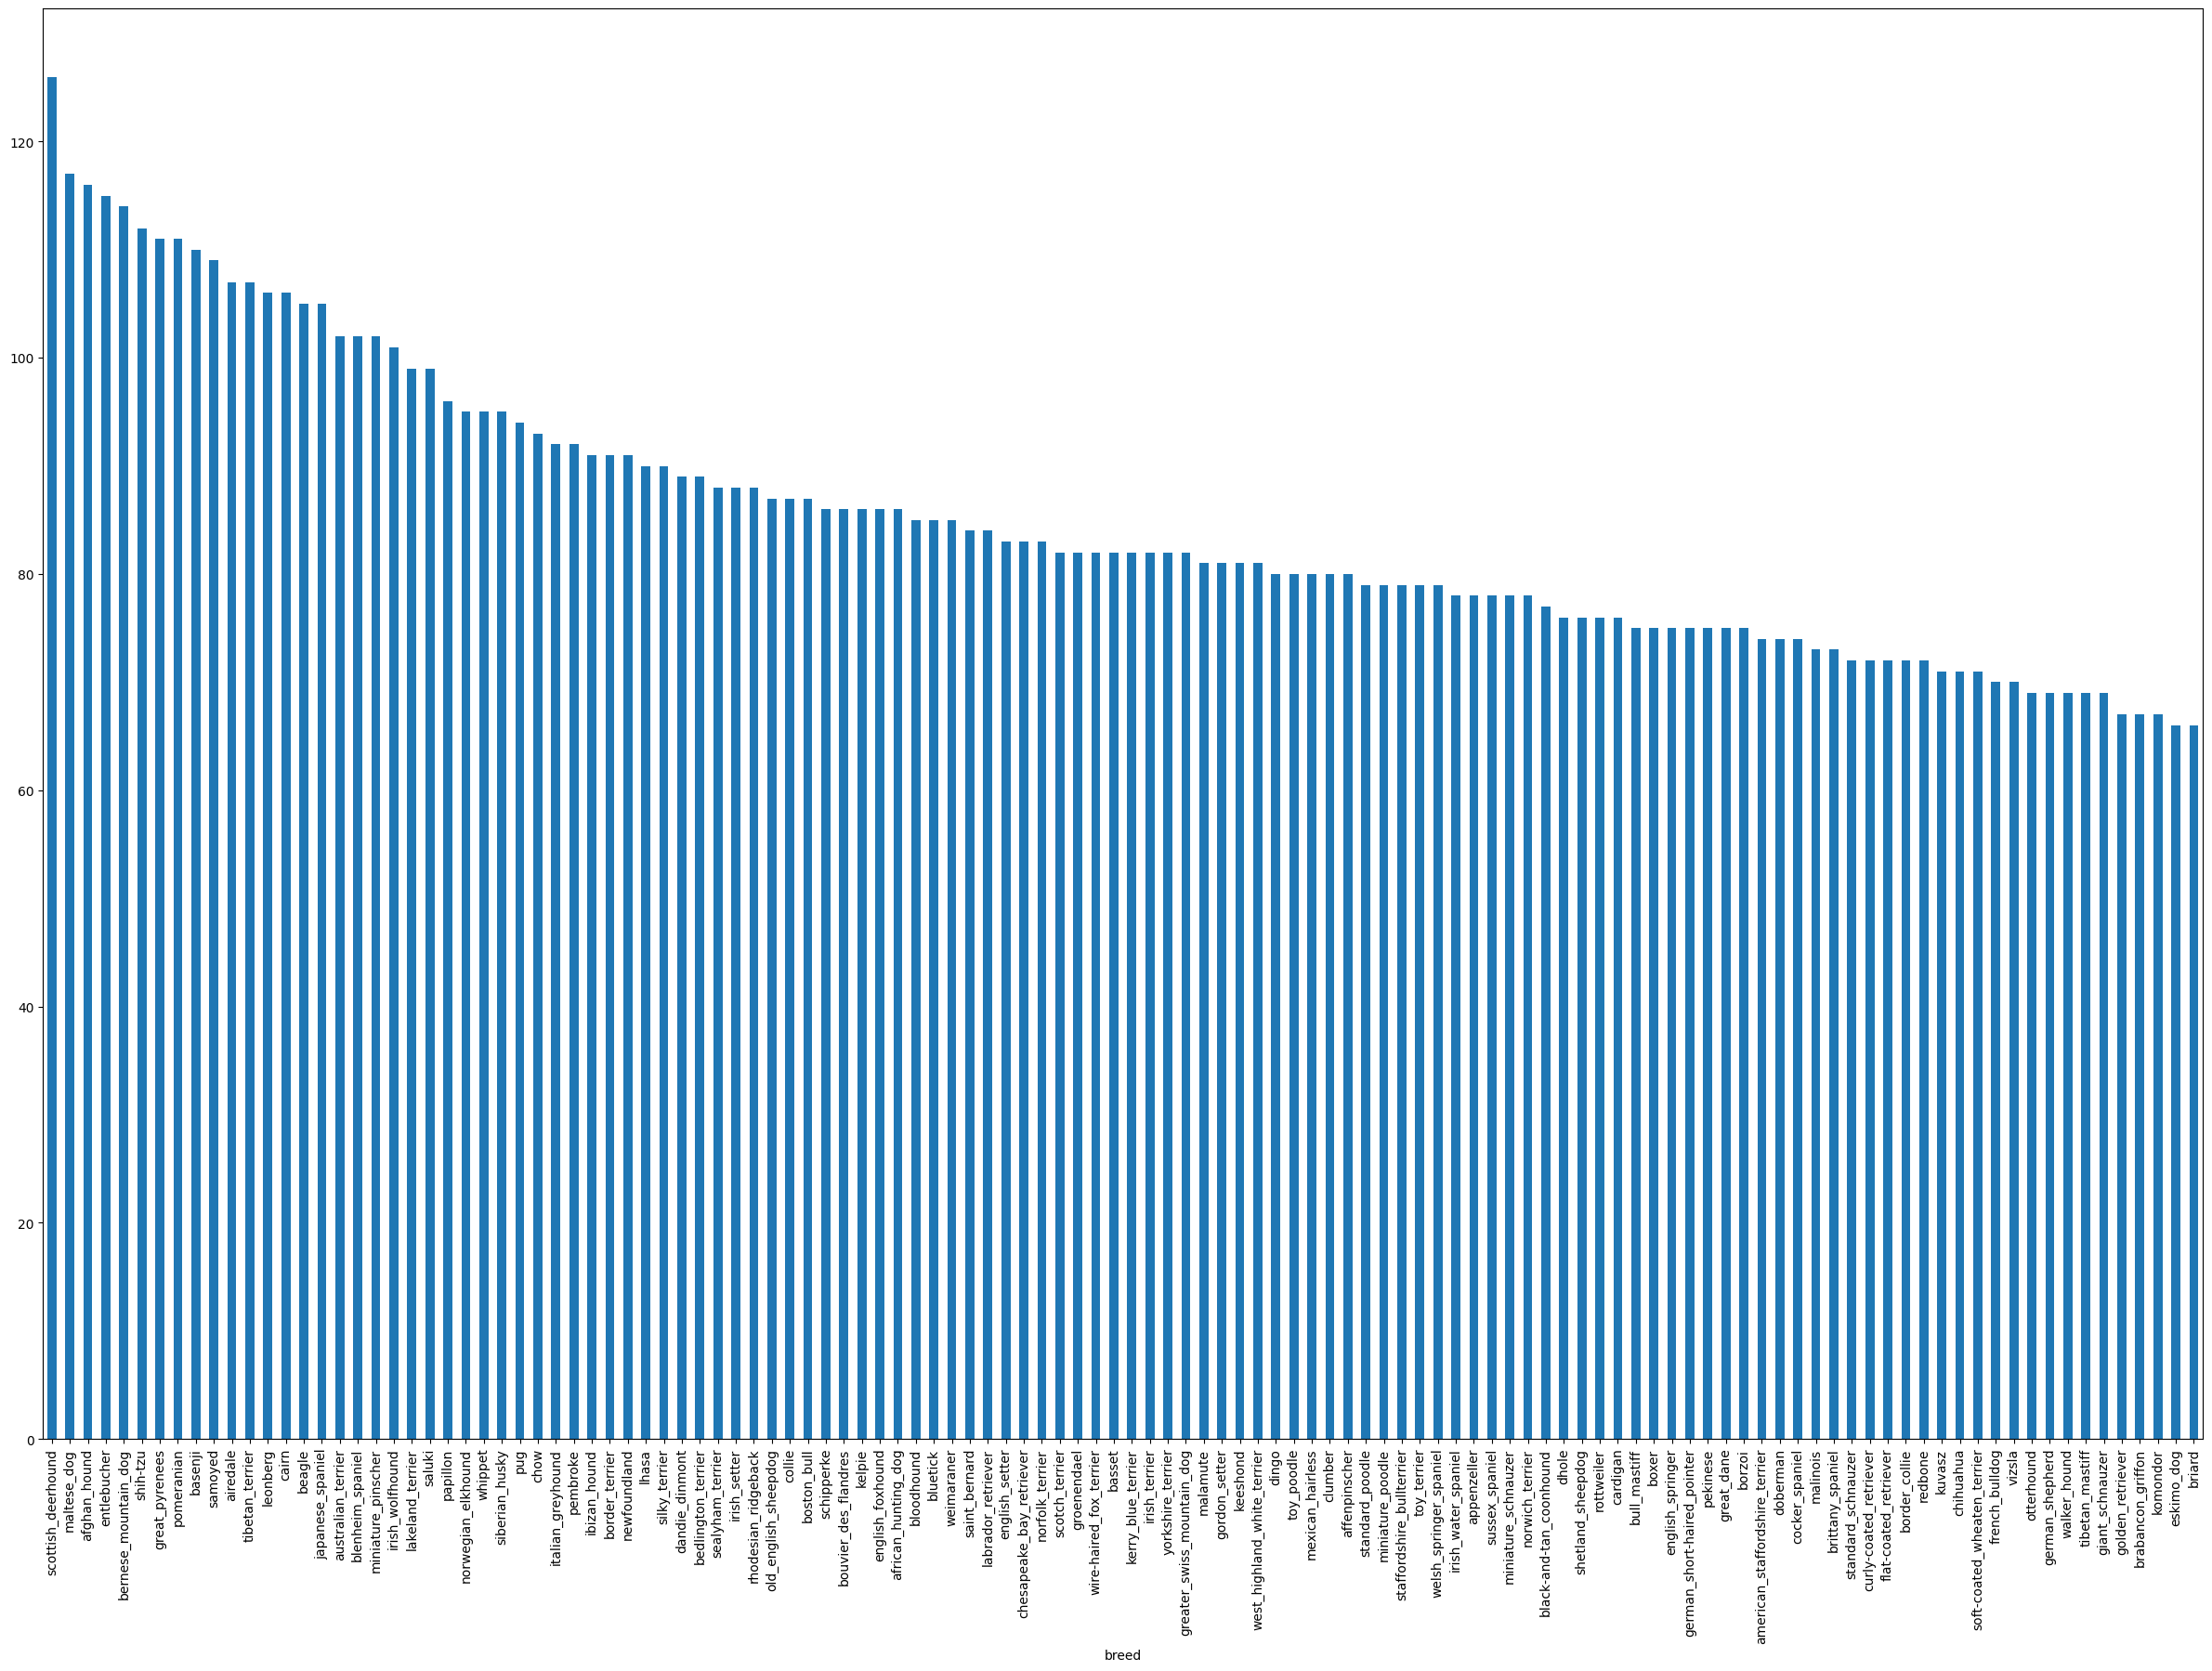

In [12]:
labels_csv["breed"].value_counts().plot.bar(figsize=(30,20))

In [14]:
labels_csv["breed"].value_counts().median()

82.0

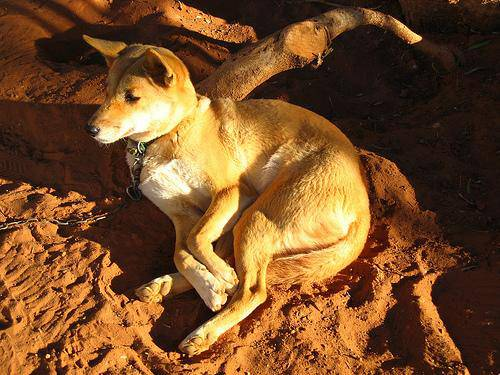

In [16]:
#image
from IPython.display import Image
Image("drive/My Drive/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

In [17]:
#create pathnames from imageID
filename=["drive/My Drive/dog-breed-identification/train/"+fname+".jpg" for fname in labels_csv["id"]]
filename

['drive/My Drive/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/dog-breed-identification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/dog-breed-identification/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/dog-breed-identification/train/0042188c895a2f14ef64a918ed9c7b64.jpg',
 'drive/My Drive/dog-breed-identification/train/004396df1acd0f1247b740ca2b14616e.jpg',
 'drive/My Drive/dog-breed-identification/t

In [18]:
# chk whther number of filenames matches number of actual image files
import os
if len(os.listdir("drive/My Drive/dog-breed-identification/train/"))==len(filename):
  print("match")
else:
  print("do not match")

do not match


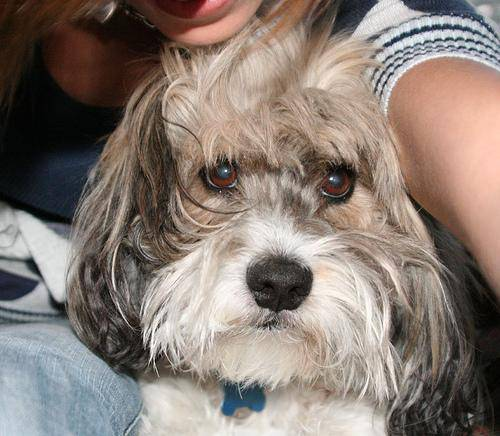

In [26]:
Image(filename[900])

In [20]:
labels_csv["breed"][900]

'lhasa'

In [21]:
#prepare labels
labels=labels_csv["breed"].to_numpy()
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [22]:
len(labels)

10222

In [23]:
len(filename)

10222

In [29]:
import numpy as np
unique_breed=np.unique(labels)
len(unique_breed)

120

In [37]:
print(labels[10])
labels[10]==unique_breed

shetland_sheepdog


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [33]:
# turn every label into boolean array
boolean_labels=[label==unique_breed for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal